In [1]:
from event_generator import Events

In [101]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
def plot(events):
    fig, ax = plt.subplots(figsize=(20,1))
    plt.plot(events, np.zeros_like(events), 'or', marker='|', markersize=15)
    xfmt = mdates.DateFormatter('%d-%m-%y %H:%M:%S')
    ax.xaxis.set_major_formatter(xfmt)
    ax.set_yticklabels([])
    plt.grid()
#     plt.savefig("examples/example9.png", bbox_inches='tight')
    plt.show()

In [3]:
def sin_signal(t, period1, period2, phase=0, m=0.3):
    period = period1 + period2
    return 1-m*(1-np.sin(2*np.pi*t/period+phase))

def pulse_wave(t, period1, period2, phase=0):
    return (t-phase)%(period1+period2)>period1

def one(t, *args):
    return 1

# Генератор событий

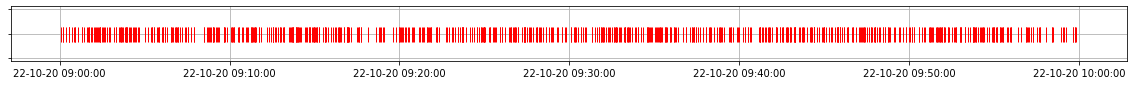

In [5]:
a = Events(1/5, [['2020-10-22 09:00:00.000000','2020-10-22 10:00:00.000000']], one, 23, 50)
plot(a.events)
evnts = np.array(a.events_in_seconds)

# Проверка пуассоновости событий

Времена между событиями подчиняются экспоненциальному распределению $Exp(\lambda)$

Для $Exp(\lambda)\;\;$: $\displaystyle\mathbb{E}[X^n]=\frac{n!}{\lambda^n}$

$\displaystyle\lambda_n=\sqrt[n]{\frac{n!}{\mathbb{E}[X^n]}}$


In [4]:
import random
from IPython.display import HTML, display
import tabulate
from event_generator import Check_Poissoness

m0 = []
m1 = []
m2 = []
m3 = []
for n in range(5):
    m = random.random()*100
    a = Events(1/5, [['2020-10-22 08:15:27.243860','2020-10-22 08:27:00.713311']], one, 300, 100)
    l0, l1, l2, l3 = Check_Poissoness(a)
    m0.append(l0)
    m1.append(l1)
    m2.append(l2)
    m3.append(l3)

table = [["m", *m0],
         ["$\lambda_1$",*m1],
         ["$\lambda_2$",*m2],
         ["$\lambda_3$",*m3]]
table = map(list, zip(*table)) #транспонирование
display(HTML(tabulate.tabulate(table, tablefmt='html')))

m,$\lambda_1$,$\lambda_2$,$\lambda_3$
0.2,0.29452938901344544,0.34587960024632414,0.3941145883936558
0.2,0.2879235695671346,0.3388179252795471,0.3853809513713851
0.2,0.263985315652306,0.3031276751431714,0.3426964924298269
0.2,0.29980246175768643,0.3399686141298749,0.3777720313210839
0.2,0.3034724061569925,0.3353035149806652,0.3694126815176296


# Pulse wave

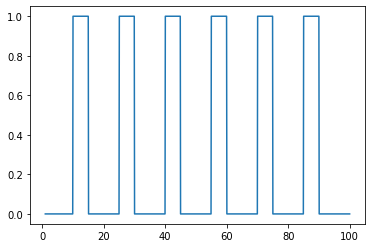

In [7]:
x = np.linspace(1, 100, 1000)
plt.plot(x, pulse_wave(x, 10, 5))
plt.show()

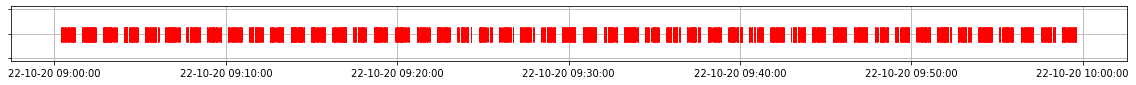

In [8]:
a = Events(1, [['2020-10-22 09:00:00.000000','2020-10-22 10:00:00.000000']], pulse_wave, 23, 50)
plot(a.events)
evnts = np.array(a.events_in_seconds)

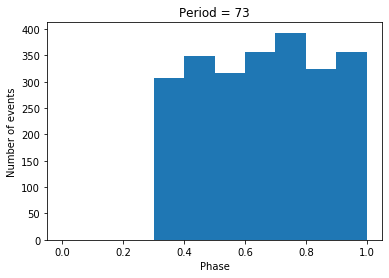

In [9]:
period = 73
n, bins, patches = plt.hist(evnts%period/period, 10, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()

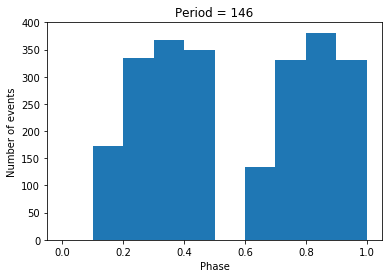

In [10]:
period = 2*73
n, bins, patches = plt.hist(evnts%period/period, 10, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()

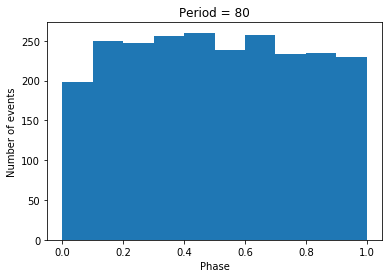

In [11]:
period = 80
n, bins, patches = plt.hist(evnts%period/period, 10, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()


# Сигнал сложной формы

In [4]:
def sin_signal(t, period1, period2, phase=0, m=0.3):
    period = period1 + period2
    return 1-m*(1-np.sin(2*np.pi*t/period+phase))

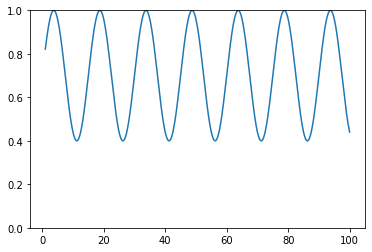

In [24]:
x = np.linspace(1, 100, 1000)
plt.plot(x, sin_signal(x, 10, 5))
plt.ylim(0, 1)
plt.show()

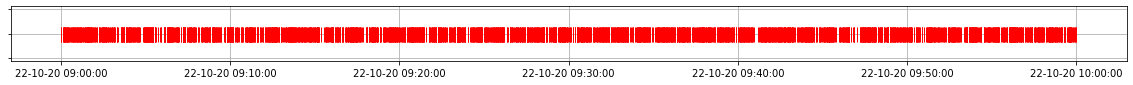

In [14]:
a = Events(1, [['2020-10-22 09:00:00.000000','2020-10-22 10:00:00.000000']], sin_signal, 23, 50)
plot(a.events)
evnts = np.array(a.events_in_seconds)
intrvls = np.array(a.intervals_in_seconds)
evnts_sin = evnts

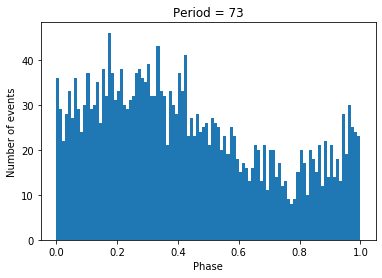

In [15]:
period = 73
n, bins, patches = plt.hist(evnts%period/period, 100, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()

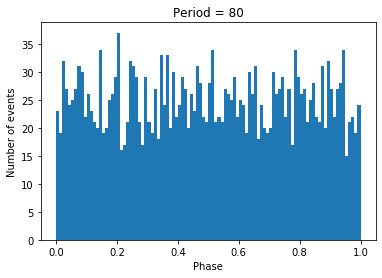

In [16]:
period = 80
n, bins, patches = plt.hist(evnts%period/period, 100, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()

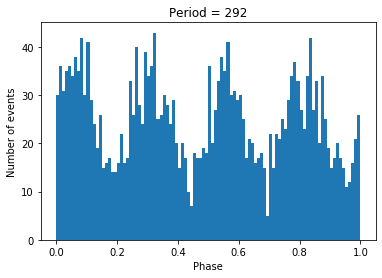

In [17]:
period = 73*4
n, bins, patches = plt.hist(evnts%period/period, 100, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()

# Поиск периодичностей


In [4]:
from search_period import periods_statistic

In [23]:
per, stat, stat1, stat2 = periods_statistic(evnts_sin, intrvls, 5, 10, 200)

start folding
folded
start exposuring
exposured
Completed for  0.0074504494667053224  minutes


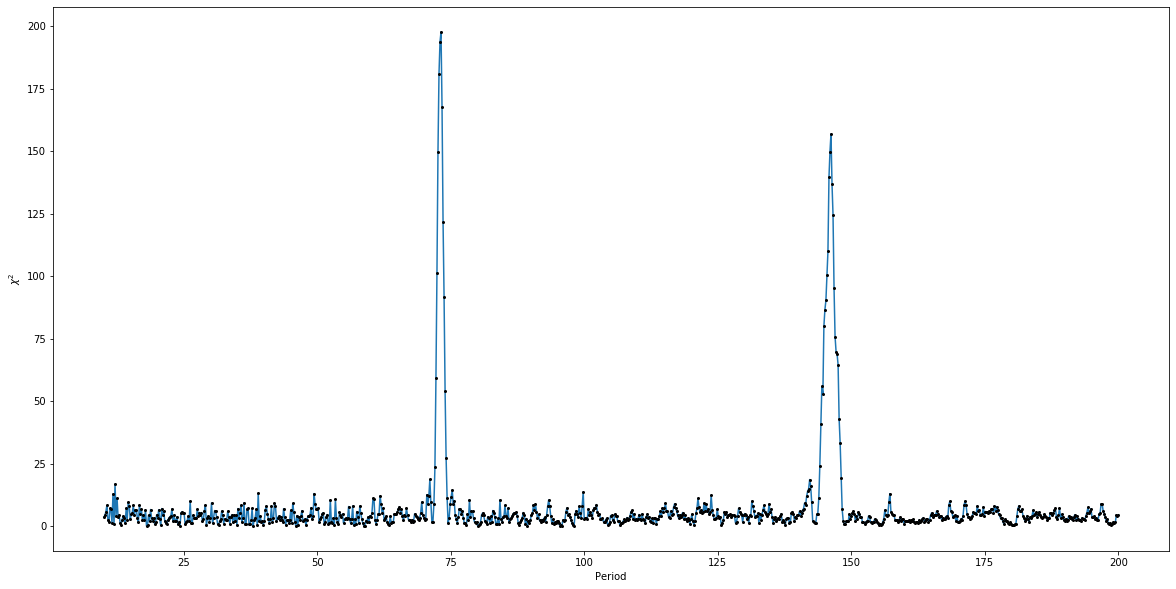

Period =  73.14314314314313


In [24]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(per, stat)
plt.plot(per, stat, 'ko', markersize=2)
plt.xlabel('Period')
plt.ylabel('$\chi^2$')
plt.show()
print("Period = ", per[np.argmax(stat)])

In [26]:
time_intervals = [['2020-11-25 00:00:00.000000','2020-11-25 12:00:00.000000'],
['2020-11-25 18:00:00.000000','2020-11-26 00:00:00.000000'],
['2020-11-26 18:00:00.000000','2020-11-28 18:00:00.000000'],
['2020-11-29 18:00:00.000000','2020-12-01 18:00:00.000000'],
                 ]
def sin_signal1(t, period1, period2, phase=0, m=0.3):
    period = period1 + period2
    return 1-m*(1-np.sin(np.pi*t/period+phase))

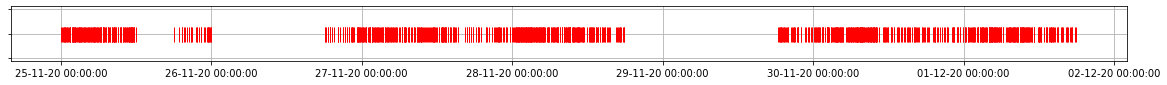

In [27]:
b = Events(1/(5*60), time_intervals, sin_signal1, 0, 12*3600)
plot(b.events)
evnts1 = np.array(b.events_in_seconds)
intrvls1 = np.array(b.intervals_in_seconds)

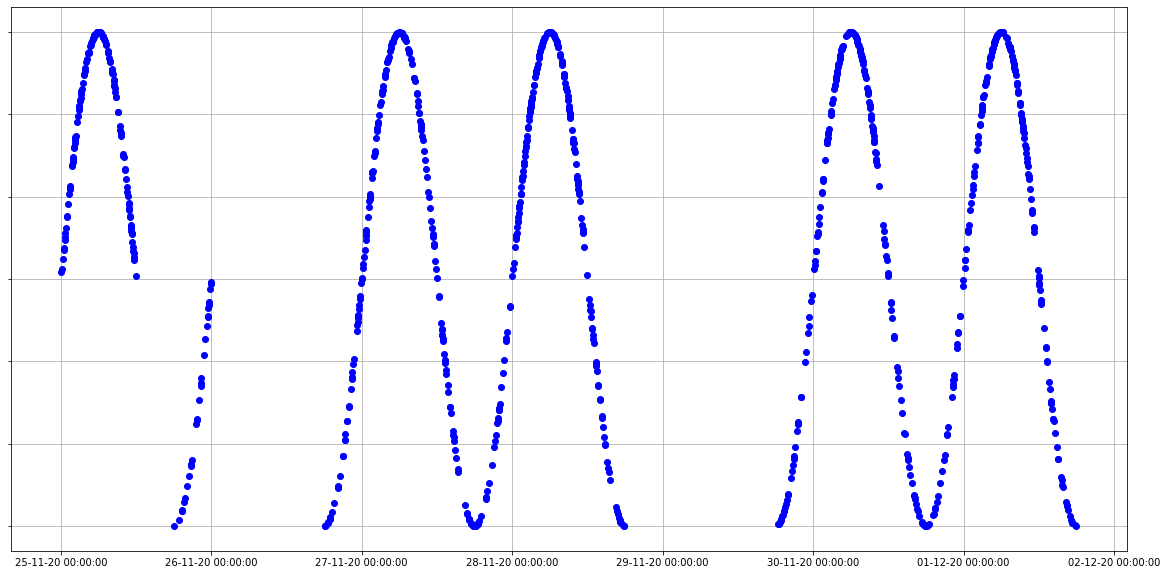

In [28]:
x = np.array(b.events_in_seconds)
y = sin_signal1(np.array(b.events_in_seconds),0, 12*3600)
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(b.events, y,'bo')
xfmt = mdates.DateFormatter('%d-%m-%y %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
ax.set_yticklabels([])
plt.grid()
plt.show()

In [29]:
per_b, stat_b, stat1_b, stat2_b = periods_statistic(evnts1, intrvls1, 5, 5*3600, 15*3600)

start folding
folded
start exposuring
exposured
Completed for  0.0064918835957845054  minutes


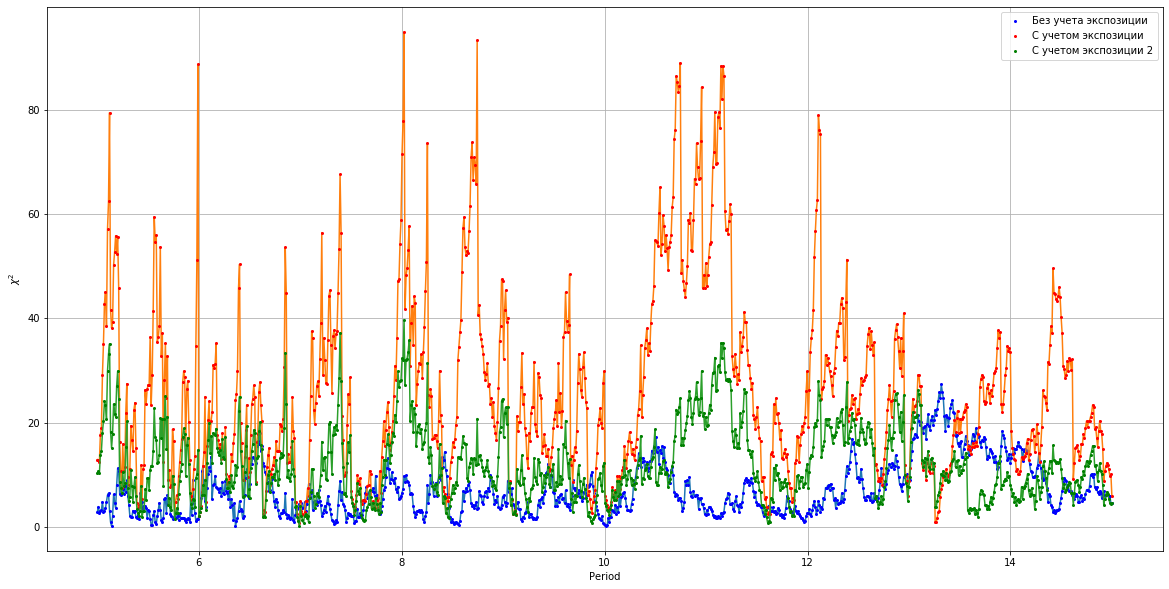

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(np.array(per_b)/(3600), stat_b)
plt.plot(np.array(per_b)/(3600), stat_b, 'bo', markersize=2, label='Без учета экспозиции')
plt.plot(np.array(per_b)/(3600), stat1_b)
plt.plot(np.array(per_b)/(3600), stat1_b, 'ro', markersize=2, label='С учетом экспозиции')
plt.plot(np.array(per_b)/(3600), stat2_b)
plt.plot(np.array(per_b)/(3600), stat2_b, 'go', markersize=2, label='С учетом экспозиции 2')
# plt.plot(np.array(per2)/(3600*24), stat2)
# plt.plot(np.array(per2)/(3600*24), stat2, 'ro', markersize=2)
plt.xlabel('Period')
plt.ylabel('$\chi^2$')
plt.legend()
plt.grid()
plt.savefig("examples/example8.png", bbox_inches='tight')
# plt.xlim(10,12)
plt.show()


In [31]:
per_b[np.argmax(stat1_b)]/3600

8.023023023023024

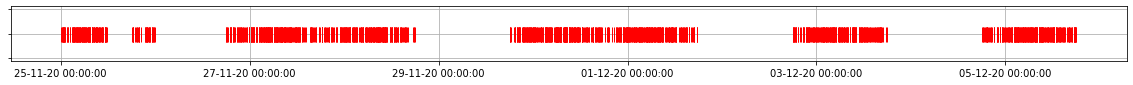

In [32]:
time_intervals1 = [['2020-11-25 00:00:00.000000','2020-11-25 12:00:00.000000'],
['2020-11-25 18:00:00.000000','2020-11-26 00:00:00.000000'],
['2020-11-26 18:00:00.000000','2020-11-28 18:00:00.000000'],
['2020-11-29 18:00:00.000000','2020-12-01 18:00:00.000000'],
['2020-12-02 18:00:00.000000','2020-12-03 18:00:00.000000'],                 
['2020-12-04 18:00:00.000000','2020-12-05 18:00:00.000000'],                  
]                 
b = Events(1/(5*60), time_intervals1, sin_signal1, 0, 12*3600)
plot(b.events)
evnts1 = np.array(b.events_in_seconds)
intrvls1 = np.array(b.intervals_in_seconds)

In [33]:
per_b, stat_b, stat1_b, stat2_b = periods_statistic(evnts1, intrvls1, 5, 5*3600, 15*3600)

start folding
folded
start exposuring
exposured
Completed for  0.005733398596445719  minutes


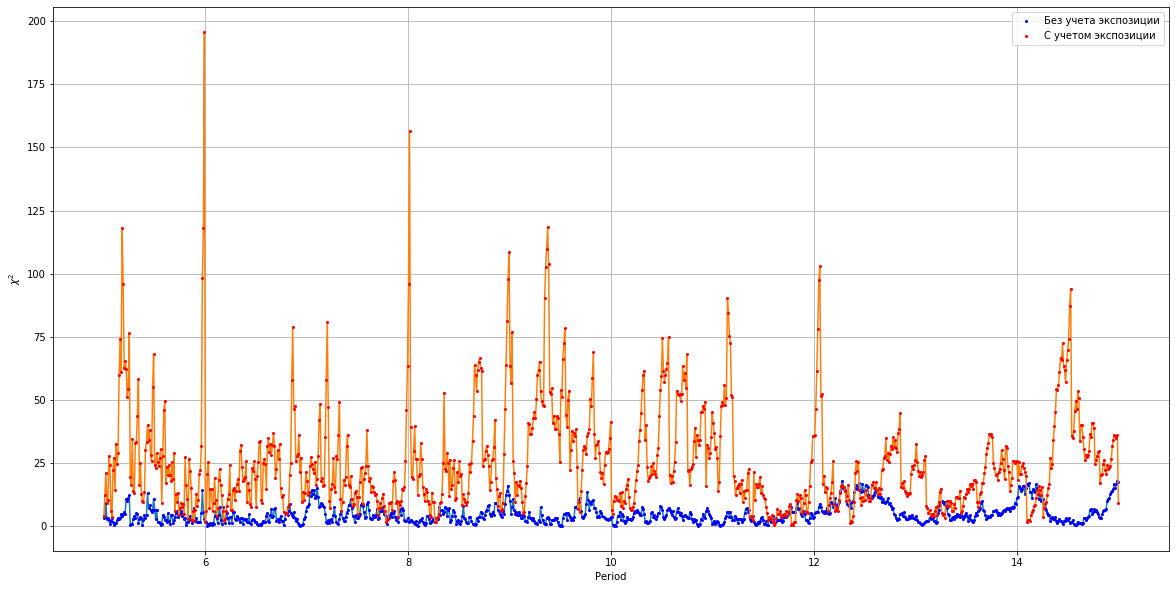

In [34]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(np.array(per_b)/(3600), stat_b)
plt.plot(np.array(per_b)/(3600), stat_b, 'bo', markersize=2, label='Без учета экспозиции')
plt.plot(np.array(per_b)/(3600), stat1_b)
plt.plot(np.array(per_b)/(3600), stat1_b, 'ro', markersize=2, label='С учетом экспозиции')
# plt.plot(np.array(per_b)/(3600), stat2_b)
# plt.plot(np.array(per_b)/(3600), stat2_b, 'go', markersize=2, label='С учетом экспозиции 2')
# plt.plot(np.array(per2)/(3600*24), stat2)
# plt.plot(np.array(per2)/(3600*24), stat2, 'ro', markersize=2)
plt.xlabel('Period')
plt.ylabel('$\chi^2$')
plt.legend()
plt.grid()

# plt.xlim(10,12)
plt.show()


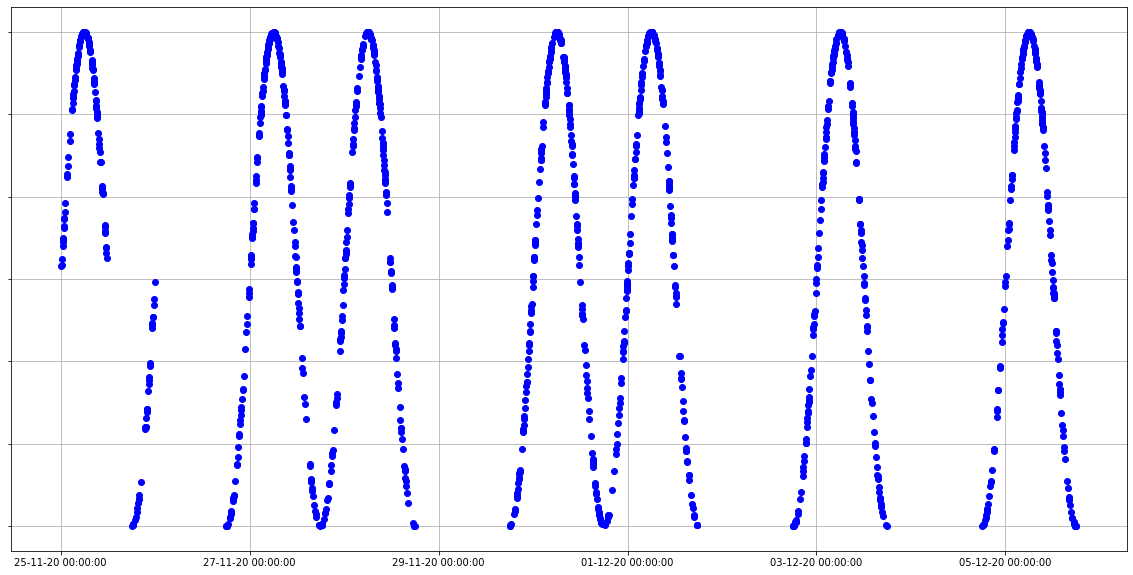

In [35]:
x = np.array(b.events_in_seconds)
y = sin_signal1(np.array(b.events_in_seconds),0, 12*3600)
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(b.events, y,'bo')
xfmt = mdates.DateFormatter('%d-%m-%y %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
ax.set_yticklabels([])
plt.grid()
plt.show()

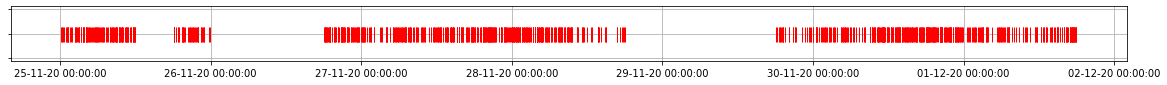

In [36]:
b = Events(1/(5*60), time_intervals, sin_signal1, 0, 16*3600)
plot(b.events)
evnts1 = np.array(b.events_in_seconds)
intrvls1 = np.array(b.intervals_in_seconds)

In [37]:
per_b, stat_b, stat1_b, stat2_b = periods_statistic(evnts1, intrvls1, 5, 5*3600, 15*3600)

start folding
folded
start exposuring
exposured
Completed for  0.004000401496887207  minutes


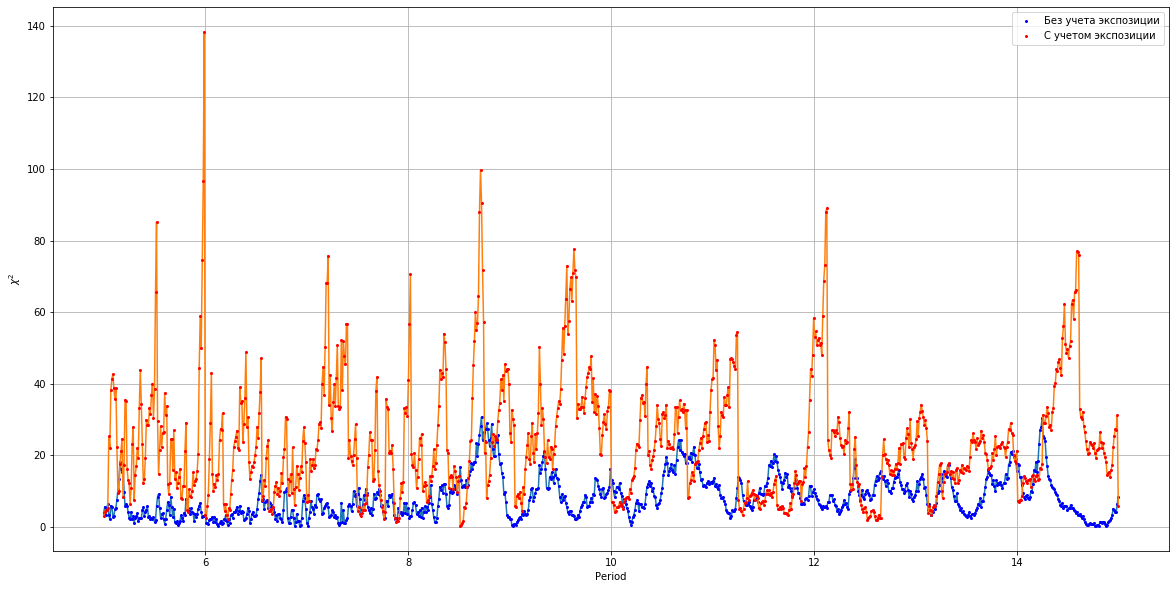

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(np.array(per_b)/(3600), stat_b)
plt.plot(np.array(per_b)/(3600), stat_b, 'bo', markersize=2, label='Без учета экспозиции')
plt.plot(np.array(per_b)/(3600), stat1_b)
plt.plot(np.array(per_b)/(3600), stat1_b, 'ro', markersize=2, label='С учетом экспозиции')
# plt.plot(np.array(per_b)/(3600), stat2_b)
# plt.plot(np.array(per_b)/(3600), stat2_b, 'go', markersize=2, label='С учетом экспозиции 2')
# plt.plot(np.array(per2)/(3600*24), stat2)
# plt.plot(np.array(per2)/(3600*24), stat2, 'ro', markersize=2)
plt.xlabel('Period')
plt.ylabel('$\chi^2$')
plt.legend()
plt.grid()
# plt.xlim(10,12)
plt.show()


# Пример

In [94]:
time_intervals = [['2020-11-20 22:00:00.000000','2020-11-21 02:00:00.000000'],
['2020-11-21 22:00:00.000000','2020-11-22 02:00:00.000000'],
['2020-11-22 22:00:00.000000','2020-11-23 02:00:00.000000'],
['2020-11-23 22:00:00.000000','2020-11-24 02:00:00.000000'],
['2020-11-24 22:00:00.000000','2020-11-25 02:00:00.000000'],
['2020-11-25 22:00:00.000000','2020-11-26 02:00:00.000000'],
['2020-11-26 22:00:00.000000','2020-11-27 02:00:00.000000'],
['2020-11-27 22:00:00.000000','2020-11-28 02:00:00.000000'],
['2020-11-28 22:00:00.000000','2020-11-29 02:00:00.000000'],
['2020-11-29 22:00:00.000000','2020-11-30 02:00:00.000000'],
['2020-11-30 22:00:00.000000','2020-12-01 02:00:00.000000'],
['2020-12-01 22:00:00.000000','2020-12-02 02:00:00.000000'],
['2020-12-02 22:00:00.000000','2020-12-03 02:00:00.000000'],
['2020-12-03 22:00:00.000000','2020-12-04 02:00:00.000000'],
['2020-12-04 22:00:00.000000','2020-12-05 02:00:00.000000'],
['2020-12-05 22:00:00.000000','2020-12-06 02:00:00.000000'],
['2020-12-06 22:00:00.000000','2020-12-07 02:00:00.000000'],
['2020-12-07 22:00:00.000000','2020-12-08 02:00:00.000000'],
['2020-12-08 22:00:00.000000','2020-12-09 02:00:00.000000'],
['2020-12-09 22:00:00.000000','2020-12-10 02:00:00.000000'],
['2020-12-10 22:00:00.000000','2020-12-11 02:00:00.000000'],
['2020-12-11 22:00:00.000000','2020-12-12 02:00:00.000000'],
['2020-12-12 22:00:00.000000','2020-12-13 02:00:00.000000'],
['2020-12-13 22:00:00.000000','2020-12-14 02:00:00.000000'],
['2020-12-14 22:00:00.000000','2020-12-15 02:00:00.000000'],
['2020-12-15 22:00:00.000000','2020-12-16 02:00:00.000000'],
['2020-12-16 22:00:00.000000','2020-12-17 02:00:00.000000'],
['2020-12-17 22:00:00.000000','2020-12-18 02:00:00.000000'],
['2020-12-18 22:00:00.000000','2020-12-19 02:00:00.000000'],
['2020-12-19 22:00:00.000000','2020-12-20 02:00:00.000000'],
['2020-12-20 22:00:00.000000','2020-12-21 02:00:00.000000'],
['2020-12-21 22:00:00.000000','2020-12-22 02:00:00.000000'],
['2020-12-22 22:00:00.000000','2020-12-23 02:00:00.000000'],
['2020-12-23 22:00:00.000000','2020-12-24 02:00:00.000000'],
['2020-12-24 22:00:00.000000','2020-12-25 02:00:00.000000'],
['2020-12-25 22:00:00.000000','2020-12-26 02:00:00.000000'],
['2020-12-26 22:00:00.000000','2020-12-27 02:00:00.000000'],
['2020-12-27 22:00:00.000000','2020-12-28 02:00:00.000000'],
['2020-12-28 22:00:00.000000','2020-12-29 02:00:00.000000'],
['2020-12-29 22:00:00.000000','2020-12-30 02:00:00.000000'],
['2020-12-30 22:00:00.000000','2020-12-31 02:00:00.000000']]

# time_intervals = [['2020-11-20 22:00:00.000000','2020-12-31 02:00:00.000000']]

In [5]:
time_intervals = []

for i in range(1,30):
    if len(str(i))==1:
        a = '2020-11-0' + str(i)+ ' 22:00:00.000000'
    else:
        a = '2020-11-' + str(i)+ ' 22:00:00.000000'
    
    if len(str(i+1))==1:
        b = '2020-11-0' + str(i+1)+ ' 02:00:00.000000'
    else:
        b = '2020-11-' + str(i+1)+ ' 02:00:00.000000'
    time_intervals.append([a,b])

time_intervals.append(['2020-11-30 22:00:00.000000', '2020-12-01 02:00:00.000000'])
for i in range(1,31):
    if len(str(i))==1:
        a = '2020-12-0' + str(i)+ ' 22:00:00.000000'
    else:
        a = '2020-12-' + str(i)+ ' 22:00:00.000000'
    
    if len(str(i+1))==1:
        b = '2020-12-0' + str(i+1)+ ' 02:00:00.000000'
    else:
        b = '2020-12-' + str(i+1)+ ' 02:00:00.000000'
    time_intervals.append([a,b])

time_intervals.append(['2020-12-31 22:00:00.000000', '2021-01-01 02:00:00.000000'])
for i in range(1,31):
    if len(str(i))==1:
        a = '2021-01-0' + str(i)+ ' 22:00:00.000000'
    else:
        a = '2021-01-' + str(i)+ ' 22:00:00.000000'
    
    if len(str(i+1))==1:
        b = '2021-01-0' + str(i+1)+ ' 02:00:00.000000'
    else:
        b = '2021-01-' + str(i+1)+ ' 02:00:00.000000'
    time_intervals.append([a,b])
    
time_intervals.append(['2021-01-31 22:00:00.000000', '2021-02-01 02:00:00.000000'])
for i in range(1,28):
    if len(str(i))==1:
        a = '2021-02-0' + str(i)+ ' 22:00:00.000000'
    else:
        a = '2021-02-' + str(i)+ ' 22:00:00.000000'
    
    if len(str(i+1))==1:
        b = '2021-02-0' + str(i+1)+ ' 02:00:00.000000'
    else:
        b = '2021-02-' + str(i+1)+ ' 02:00:00.000000'
    time_intervals.append([a,b])    
    
time_intervals.append(['2021-02-28 22:00:00.000000', '2021-03-01 02:00:00.000000'])
for i in range(1,31):
    if len(str(i))==1:
        a = '2021-03-0' + str(i)+ ' 22:00:00.000000'
    else:
        a = '2021-03-' + str(i)+ ' 22:00:00.000000'
    
    if len(str(i+1))==1:
        b = '2021-03-0' + str(i+1)+ ' 02:00:00.000000'
    else:
        b = '2021-03-' + str(i+1)+ ' 02:00:00.000000'
    time_intervals.append([a,b])
print(len(time_intervals))

150


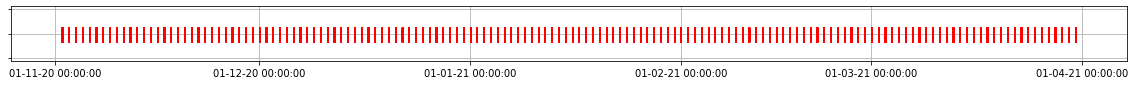

42282


0.2446875

In [6]:
a = Events(100/(60*60), time_intervals, sin_signal, 0, 11*24*3600)
# a = Events(1, time_intervals, sin_signal, 0, 2*24*3600)
plot(a.events)
evnts = np.array(a.events_in_seconds)
intrvls = np.array(a.intervals_in_seconds)
print(len(evnts))
len(evnts)/np.sum(intrvls[1]-intrvls[0])

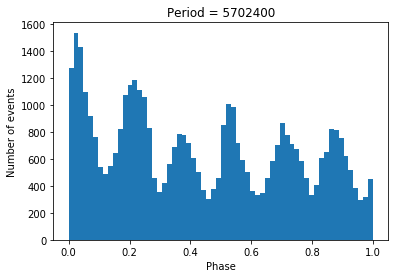

In [7]:
period = 6*11*24*3600
n, bins, patches = plt.hist(evnts%period/period, 62, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()

In [8]:
x = np.array(a.events_in_seconds)
y = sin_signal(np.array(a.events_in_seconds),0, 11*24*3600)

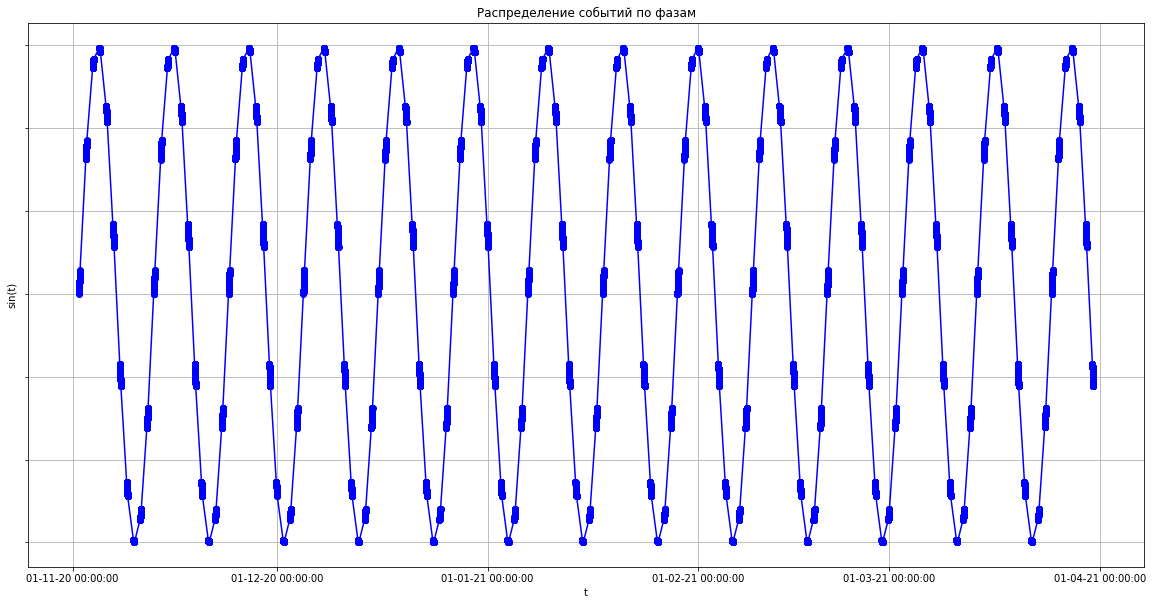

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(a.events, y,'bo-', alpha = 1)
xfmt = mdates.DateFormatter('%d-%m-%y %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
ax.set_yticklabels([])
plt.grid()
plt.title('Распределение событий по фазам')
plt.ylabel('sin(t)')
plt.xlabel('t')
plt.show()

In [10]:
nsteps = 1000
per, stat, stat1, stat2 = periods_statistic(evnts, intrvls, 5, 2*3600, 20*24*3600, n_steps = nsteps)

Completed for 0.05543468395868937 minutes


/Users/Maksat/Desktop/IKI/xraybursters/search_period.py:14: RuntimeWarning: invalid value encountered in true_divide
  folded1 = folded/((expo.T/np.max(expo, axis=1)).T)
/Users/Maksat/Desktop/IKI/xraybursters/search_period.py:24: RuntimeWarning: invalid value encountered in true_divide
  chi_square2 = np.sum((folded2 - expected2)**2/expected2, axis=1)


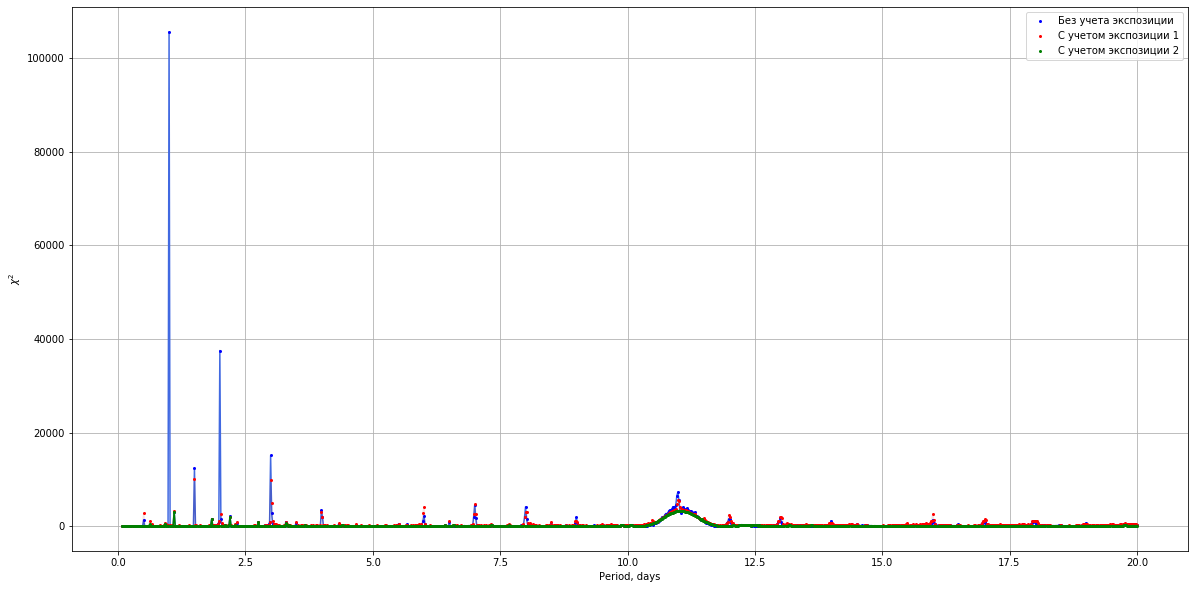

In [16]:
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(np.array(per)/(3600*24), stat, 'royalblue')
plt.plot(np.array(per)/(3600*24), stat, 'bo', markersize=2, label='Без учета экспозиции')

plt.plot(np.array(per)/(3600*24), stat1, 'darkred', alpha = 0.1)
plt.plot(np.array(per)/(3600*24), stat1, 'ro', markersize=2, label='С учетом экспозиции 1')

plt.plot(np.array(per)/(3600*24), stat2, 'g')
plt.plot(np.array(per)/(3600*24), stat2, 'go', markersize=2, label='С учетом экспозиции 2')
# plt.plot(np.array(per2)/(3600*24), stat2)
# plt.plot(np.array(per2)/(3600*24), stat2, 'ro', markersize=2)
plt.xlabel('Period, days')
plt.ylabel('$\chi^2$')
plt.legend()
plt.grid()
# plt.savefig("examples/example6.png", bbox_inches='tight')
# plt.xlim(10,15)
# plt.ylim(0, 5000)
plt.show()


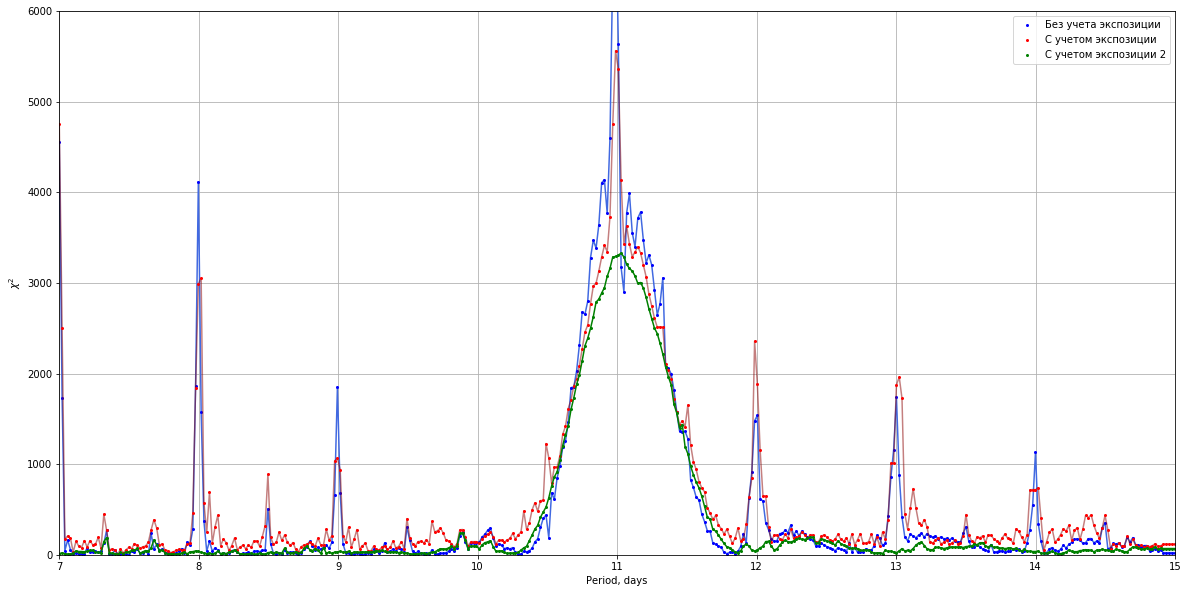

In [17]:
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(np.array(per)/(3600*24), stat, 'royalblue')
plt.plot(np.array(per)/(3600*24), stat, 'bo', markersize=2, label='Без учета экспозиции')

plt.plot(np.array(per)/(3600*24), stat1, 'darkred', alpha = 0.5)
plt.plot(np.array(per)/(3600*24), stat1, 'ro', markersize=2, label='С учетом экспозиции')

plt.plot(np.array(per)/(3600*24), stat2, 'g')
plt.plot(np.array(per)/(3600*24), stat2, 'go', markersize=2, label='С учетом экспозиции 2')

# plt.plot(np.array(per2)/(3600*24), stat2)
# plt.plot(np.array(per2)/(3600*24), stat2, 'ro', markersize=2)
plt.xlabel('Period, days')
plt.ylabel('$\chi^2$')
plt.legend()
plt.grid()
# plt.savefig("examples/example6.png", bbox_inches='tight')
plt.xlim(7,15)
plt.ylim(0, 6000)
plt.show()


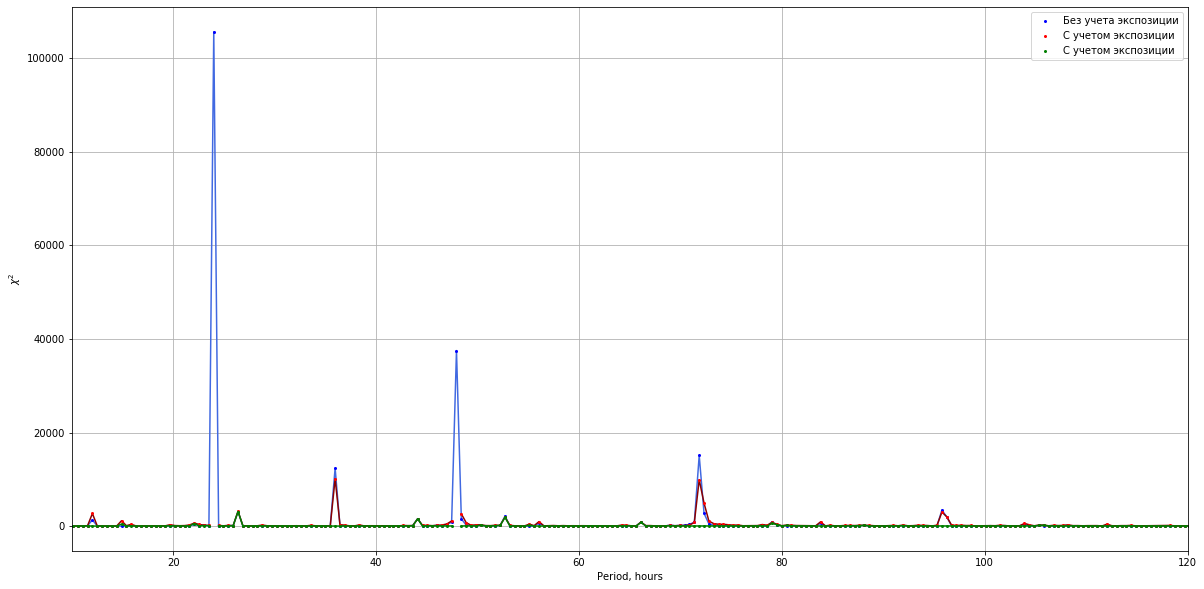

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(np.array(per)/(3600), stat, 'royalblue')
plt.plot(np.array(per)/(3600), stat, 'bo', markersize=2, label='Без учета экспозиции')
plt.plot(np.array(per)/(3600), stat1, 'darkred')
plt.plot(np.array(per)/(3600), stat1, 'ro', markersize=2, label='С учетом экспозиции')
plt.plot(np.array(per)/(3600), stat2, 'g')
plt.plot(np.array(per)/(3600), stat2, 'go', markersize=2, label='С учетом экспозиции')

# plt.plot(np.array(per2)/(3600*24), stat2)
# plt.plot(np.array(per2)/(3600*24), stat2, 'ro', markersize=2)
plt.xlabel('Period, hours')
plt.ylabel('$\chi^2$')
plt.legend()
plt.grid()
# plt.savefig("examples/example6.png", bbox_inches='tight')
plt.xlim(10,5*24)
plt.show()


In [94]:
num = 100
freq = len(evnts)/(len(time_intervals)*4*3600)
print(freq)
stats = np.zeros((num, nsteps))
for i in range(num):
    x = Events(freq, time_intervals, one, 1, 0)
    xevnts = np.array(x.events_in_seconds)
    xintrvls = np.array(x.intervals_in_seconds)
    print(i)
    xper, xstat, xstat1, xstat2 = periods_statistic(xevnts, xintrvls, 5, 2*3600, 20*24*3600, n_steps = nsteps)
    stats[i] = xstat1
    

0.019575
0


/Users/Maksat/Desktop/IKI/xraybursters/search_period.py:14: RuntimeWarning: invalid value encountered in true_divide
  folded1 = folded/((expo.T/np.max(expo, axis=1)).T)
/Users/Maksat/Desktop/IKI/xraybursters/search_period.py:24: RuntimeWarning: invalid value encountered in true_divide
  chi_square2 = np.sum((folded2 - expected2)**2/expected2, axis=1)


Completed for 0.09554874897003174 minutes
1
Completed for 0.055552264054616295 minutes
2
Completed for 0.07219009399414063 minutes
3
Completed for 0.05614451964696248 minutes
4
Completed for 0.07698798179626465 minutes
5
Completed for 0.08598874807357788 minutes
6
Completed for 0.0580411950747172 minutes
7
Completed for 0.07416776418685914 minutes
8
Completed for 0.05210014581680298 minutes
9
Completed for 0.041150418917338054 minutes
10
Completed for 0.0440072496732076 minutes
11
Completed for 0.03944136699040731 minutes
12
Completed for 0.038848384221394854 minutes
13
Completed for 0.03905119895935059 minutes
14
Completed for 0.038180152575174965 minutes
15
Completed for 0.03869346777598063 minutes
16
Completed for 0.038770103454589845 minutes
17
Completed for 0.0383183479309082 minutes
18
Completed for 0.04007479747136434 minutes
19
Completed for 0.03834773302078247 minutes
20
Completed for 0.03837856451670329 minutes
21
Completed for 0.0386177659034729 minutes
22
Completed for 0.03

/Users/Maksat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


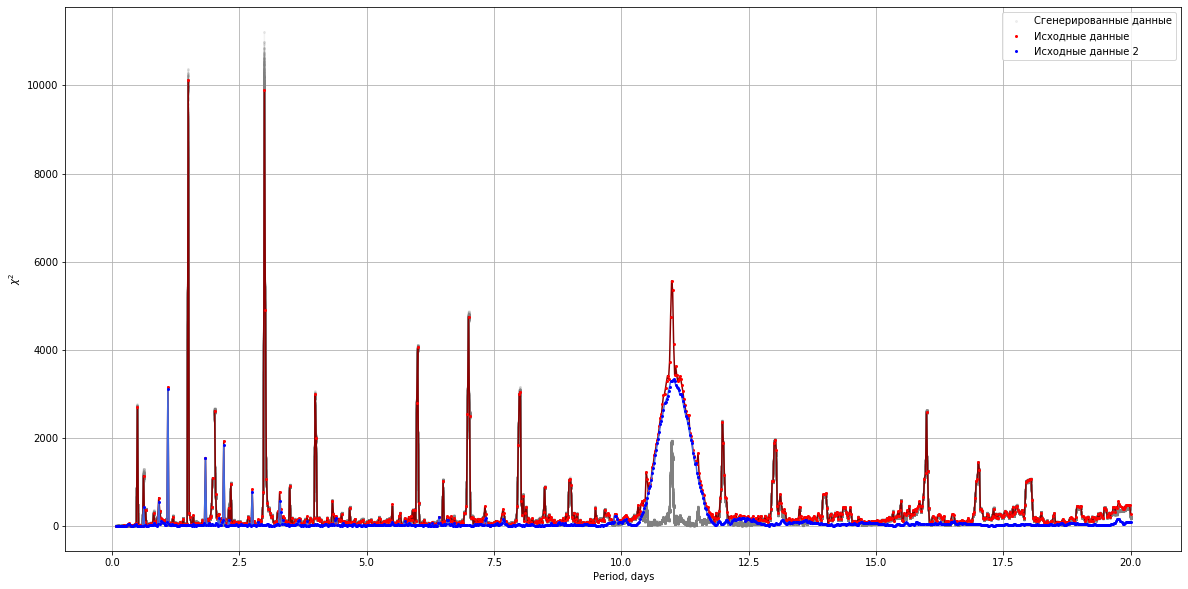

In [97]:
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(np.array(xper)/(3600*24), stats[0], 'grey', alpha = 0.1)
plt.plot(np.array(xper)/(3600*24), stats[0], 'o', color='gray', markersize=2, alpha = 0.1, label='Сгенерированные данные')
for i in range(1, num):
    plt.plot(np.array(xper)/(3600*24), stats[i], 'grey', alpha = 0.1)
    plt.plot(np.array(xper)/(3600*24), stats[i], 'o', color='gray', markersize=2, alpha = 0.1)
    
plt.plot(np.array(per)/(3600*24), stat1, 'darkred', alpha = 1.0)
plt.plot(np.array(per)/(3600*24), stat1, 'ro', markersize=2, label='Исходные данные')

plt.plot(np.array(per)/(3600*24), stat2, 'royalblue', alpha = 1.0)
plt.plot(np.array(per)/(3600*24), stat2, 'bo', markersize=2, label='Исходные данные 2')
plt.xlabel('Period, days')
plt.ylabel('$\chi^2$')
plt.legend()
plt.grid()
# plt.savefig("examples/example10.png", bbox_inches='tight', dpi=500)
# plt.xlim(7, 15)
# plt.ylim(0, 5000)
plt.show()

/Users/Maksat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


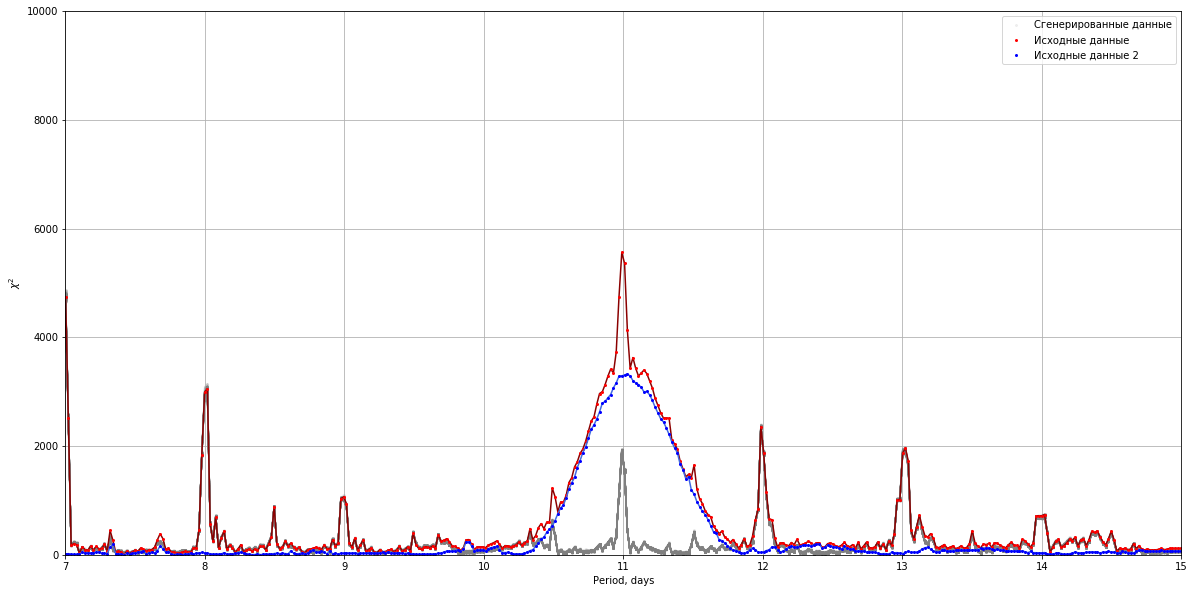

In [103]:
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(np.array(xper)/(3600*24), stats[0], 'grey', alpha = 0.1)
plt.plot(np.array(xper)/(3600*24), stats[0], 'o', color='gray', markersize=2, alpha = 0.1, label='Сгенерированные данные')
for i in range(1, num):
    plt.plot(np.array(xper)/(3600*24), stats[i], 'grey', alpha = 0.1)
    plt.plot(np.array(xper)/(3600*24), stats[i], 'o', color='gray', markersize=2, alpha = 0.1)
    

plt.plot(np.array(per)/(3600*24), stat1, 'darkred', alpha = 1.0)
plt.plot(np.array(per)/(3600*24), stat1, 'ro', markersize=2, label='Исходные данные')

plt.plot(np.array(per)/(3600*24), stat2, 'royalblue', alpha = 1.0)
plt.plot(np.array(per)/(3600*24), stat2, 'bo', markersize=2, label='Исходные данные 2')

plt.xlabel('Period, days')
plt.ylabel('$\chi^2$')
plt.legend()
plt.grid()
plt.xlim(7, 15)
plt.ylim(0, 10000)
plt.savefig("examples/example11.png", bbox_inches='tight', dpi=500)
plt.show()

/Users/Maksat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


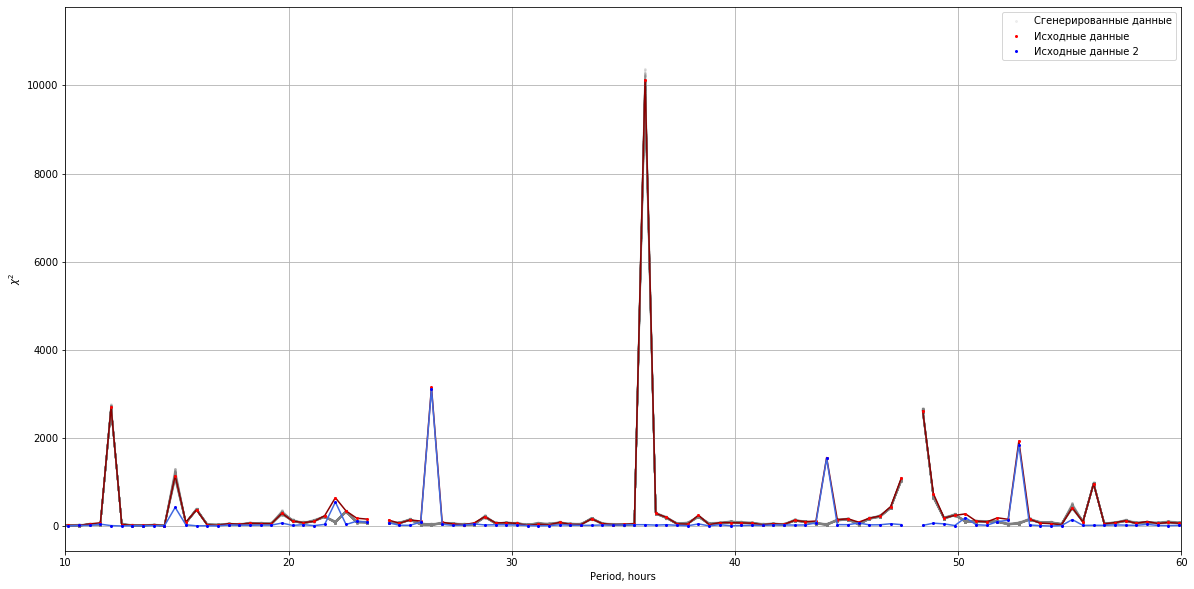

In [104]:
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(np.array(xper)/(3600), stats[0], 'grey', alpha = 0.1)
plt.plot(np.array(xper)/(3600), stats[0], 'o', color='gray', markersize=2, alpha = 0.1, label='Сгенерированные данные')
for i in range(num):
    plt.plot(np.array(xper)/(3600), stats[i], 'grey', alpha = 0.1)
    plt.plot(np.array(xper)/(3600), stats[i], 'o', color='gray', markersize=2, alpha = 0.1)
    
plt.plot(np.array(per)/(3600), stat1, 'darkred', alpha = 1.0)
plt.plot(np.array(per)/(3600), stat1, 'ro', markersize=2, label='Исходные данные')

plt.plot(np.array(per)/(3600), stat2, 'royalblue', alpha = 1.0)
plt.plot(np.array(per)/(3600), stat2, 'bo', markersize=2, label='Исходные данные 2')
plt.xlabel('Period, hours')
plt.ylabel('$\chi^2$')
plt.legend()
plt.grid()
plt.xlim(10,2.5*24)
# plt.ylim(0, 10000)
plt.savefig("examples/example12.png", bbox_inches='tight', dpi=500)
plt.show()

In [37]:
p = per[500:]
p[np.argmax(stat2[500:])]/3600/24

11.028528528528527

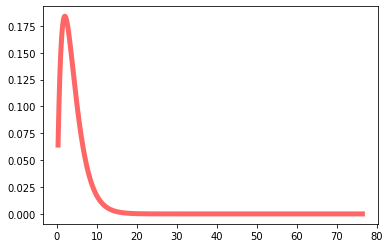

In [44]:
from scipy.stats import chi2
df = 4
x = np.linspace(chi2.ppf(0.01, df),
                chi2.ppf(1-1e-15, df), 1000)
plt.plot(x, chi2.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='chi2 pdf')
plt.show()

$(1-c/100)=N_pQ_{n-1}(\chi_0^2=S_0)$

$N_p=1000$ - число периодов

$n=5$ -число бинов

$\displaystyle Q_{n-1}(\chi_0^2=S_0)= \int_{\chi_0^2}^\infty p_{n-1}(\chi^2)d\chi^2$


$\displaystyle 1-c/100=1000\cdot \int_{\chi_0^2}^\infty p_{4}(\chi^2)d\chi^2=1000\cdot \int_{\chi_0^2}^\infty \frac{1}{2^2\Gamma(2)}xe^{-x/2}dx=250\int_{\chi_0^2}^\infty xe^{-x/2}dx=500(\chi_0^2+2)e^{-\chi_0^2/2}$

$1-c/100=500(\chi_0^2+2)e^{-\chi_0^2/2}$

$\chi_0^2=832.3$

$1-c/100=7.72\cdot10^{-176}$

In [88]:
chi = np.max(stat2[500:])/4
print(chi)
# np.array([np.exp(-chi/2)], dtype=np.float256)
500*(chi+2)*np.longdouble(np.exp(-chi/2))

832.304113722443


7.7224029981727813474e-176